# Structured Low-Rank Reconstruction with Submatrix Constraints - Phantom

In [2]:
# Import and setup notebook

import numpy as np
import skimage
import SLR
import matplotlib.pyplot as plt
import utils
import h5py

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Define Phantom

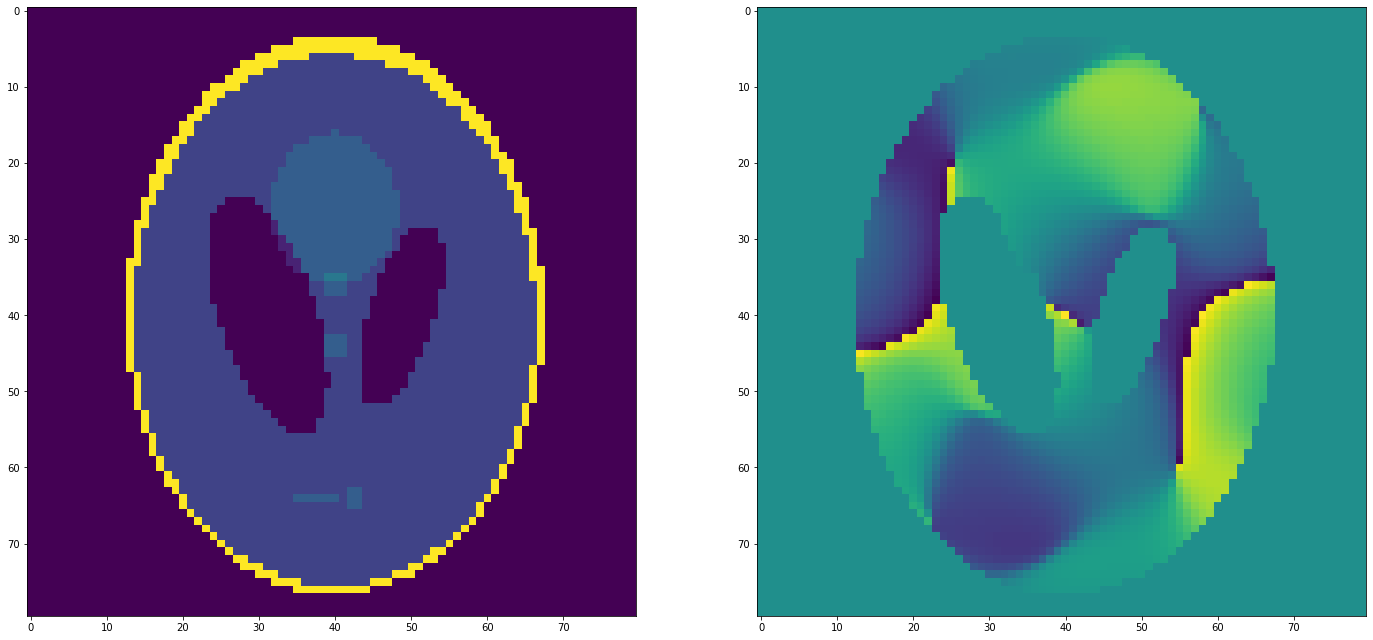

In [3]:
# Define 80x80 Shepp Logan Phantom w/ smooth phase
x = skimage.data.shepp_logan_phantom()[::5,::5]
phs = np.angle(utils.ifftdim(np.pad(np.random.standard_normal((6,6)),((37,37),(37,37)))))
x = x*np.exp(1j*phs)
x = x/np.max(np.abs(utils.fftdim(x)))

# Plot ground truth image magnitude and phase
_, ax = plt.subplots(1,2, figsize=(24,12))

ax[0].imshow(np.abs(x))
ax[1].imshow(np.angle(x))

## Define Partial Fourier Sampling Mask

Under-sampling ratio: 0.5059375


Text(0.5, 1.0, 'iFFT')

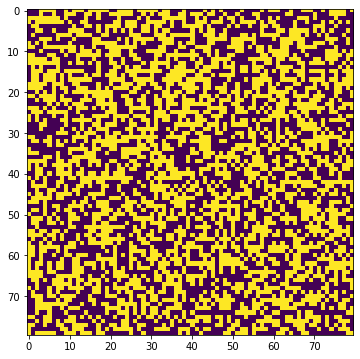

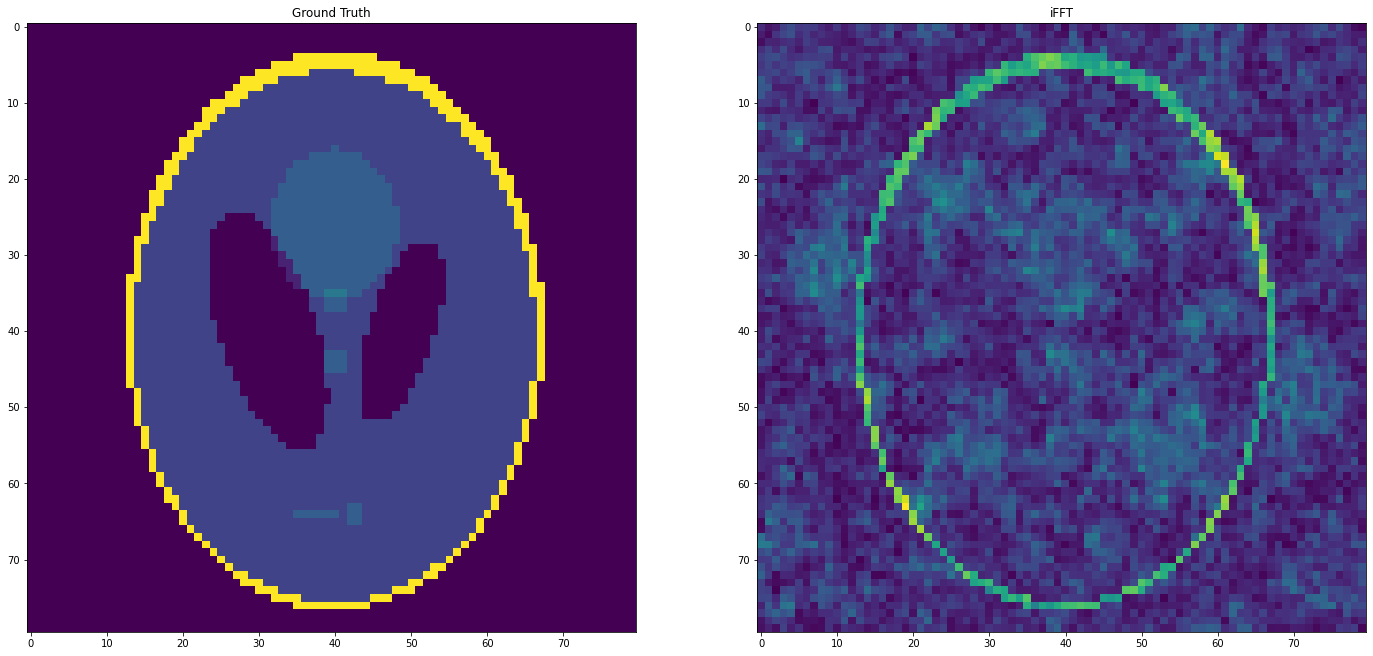

In [30]:
# Define Partial Fourier sampling mask
# mask1 = np.zeros((80,80))
# # mask[:55,:] = 1
# mask1[::2,:] = 1
# mask1[39:40,:] = 1

mask1=np.random.random((80,80)) >= 0.5
mask1[39:40,39:40] = True
print(f'Under-sampling ratio: {np.count_nonzero(mask1)/80**2}')


# Plot sampling mask
_, ax = plt.subplots(figsize=(6,6))
ax.imshow(mask1)

# sample and add noise
fx1 = (utils.fftdim(x)+utils.noise(x.shape, 1E-3))*mask1
pg = utils.fftdim(x)
# pg.shape

_, ax = plt.subplots(1,2, figsize=(24,24))

ax[0].imshow(np.abs(utils.ifftdim(pg, dims=(0,1))))
ax[0].set_title('Ground Truth')
ax[1].imshow(np.abs(utils.ifftdim(fx1, dims=(0,1))))
ax[1].set_title('iFFT')

## Sample data and add noise

## Define helper functions and setup parameters

In [22]:
# def rmse(z):
#     return np.linalg.norm(x.ravel()-utils.ifftdim(z).ravel())/np.linalg.norm(x.ravel())
def rmse(z):
    return np.linalg.norm(pg.ravel()-z.ravel())/np.linalg.norm(pg.ravel())


N = 1000
kernel = (9,9)
# param = 1E-10
# r = 100

## ADMM, VCC

### Full Matrix Reconstruction

In [111]:
fx1_0 = (utils.fftdim(x)+utils.noise(x.shape, 0))*mask1
N = 1200

for r in np.arange(110,130,5):
    z = SLR.ADMM(fx1_0, SLR.vcc_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z[0])}')

Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.3087644950313306
Iter: 200, RMSE: 0.2273053204234491
Iter: 300, RMSE: 0.16143425989568388
Iter: 400, RMSE: 0.08607314087457614
Iter: 500, RMSE: 0.04308554276440046
Iter: 600, RMSE: 0.03627261044036066
Iter: 700, RMSE: 0.035278844111476894
Iter: 800, RMSE: 0.03410986412878018
Iter: 900, RMSE: 0.03391048068089923
Iter: 1000, RMSE: 0.03421825985756255
Iter: 1100, RMSE: 0.03415027823385325
Rank: 110, Full Matrix, RMSE: 0.03477204065589394
Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.42225573680188727
Iter: 200, RMSE: 0.3473366560775379
Iter: 300, RMSE: 0.24376531576878027
Iter: 400, RMSE: 0.16622521419006317
Iter: 500, RMSE: 0.1033535208258836
Iter: 600, RMSE: 0.05137506713222481
Iter: 700, RMSE: 0.02325337141350077
Iter: 800, RMSE: 0.017297385931538897
Iter: 900, RMSE: 0.015798018704790407
Iter: 1000, RMSE: 0.015311166681215144
Iter: 1100, RMSE: 0.015255663342468207
Rank: 115, Full Matrix, RMSE: 0.015337167274825108
Iter: 0, RMS

In [146]:
N=1200
for r in np.arange(110,125,5):
    x2ini = SLR.ADMM(fx1_0, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')

Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.33593338785489885
Iter: 200, RMSE: 0.1704907918011243
Iter: 300, RMSE: 0.08729530795783912
Iter: 400, RMSE: 0.028786370819252262
Iter: 500, RMSE: 0.014930855131450255
Iter: 600, RMSE: 0.013668814196500303
Iter: 700, RMSE: 0.013020530687361757
Iter: 800, RMSE: 0.01293170475313504
Iter: 900, RMSE: 0.013272285207841872
Iter: 1000, RMSE: 0.014831286234197279
Iter: 1100, RMSE: 0.013213986533768882
Rank: 110, Batch Size (Block): 2, RMSE: 0.015978740837664925
Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.3869682334235603
Iter: 200, RMSE: 0.2547908392508818
Iter: 300, RMSE: 0.14042230308403572
Iter: 400, RMSE: 0.07871671609321872
Iter: 500, RMSE: 0.027917187146321264
Iter: 600, RMSE: 0.008935968048143509
Iter: 700, RMSE: 0.008137061830756643
Iter: 800, RMSE: 0.007930204497215952
Iter: 900, RMSE: 0.007705952791813549
Iter: 1000, RMSE: 0.007775931299561184
Iter: 1100, RMSE: 0.007375671754249211
Rank: 115, Batch Size (Block): 2, RMSE: 0.

In [147]:
N=1200
for r in np.arange(120,135,5):
    x2ini = SLR.ADMM(fx1_0, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')

Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.45282919456878234
Iter: 200, RMSE: 0.37097092442802326
Iter: 300, RMSE: 0.2885132166183015
Iter: 400, RMSE: 0.19104082148550264
Iter: 500, RMSE: 0.12781264395489658
Iter: 600, RMSE: 0.08473015965737007
Iter: 700, RMSE: 0.049329702684811266
Iter: 800, RMSE: 0.019164086015983992
Iter: 900, RMSE: 0.006333334827426155
Iter: 1000, RMSE: 0.004574127482704424
Iter: 1100, RMSE: 0.004618112678766699
Rank: 120, Batch Size (Block): 2, RMSE: 0.004559664653565228
Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.4923883190399933
Iter: 200, RMSE: 0.4651282239911549
Iter: 300, RMSE: 0.43421701874137913
Iter: 400, RMSE: 0.38317127011296775
Iter: 500, RMSE: 0.33289411713932504
Iter: 600, RMSE: 0.2771876435422541
Iter: 700, RMSE: 0.2114618742918668
Iter: 800, RMSE: 0.1499130012836786
Iter: 900, RMSE: 0.11090062403668452
Iter: 1000, RMSE: 0.08219153120377462
Iter: 1100, RMSE: 0.05825633795007702
Rank: 125, Batch Size (Block): 2, RMSE: 0.034939952173

In [149]:
N=1200
for r in np.arange(105,120,5):
    x4ini = SLR.ADMM(fx1_0, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.3080039019105765
Iter: 200, RMSE: 0.15922592836581495
Iter: 300, RMSE: 0.08817941918516115
Iter: 400, RMSE: 0.038794633582166796
Iter: 500, RMSE: 0.0193423146384069
Iter: 600, RMSE: 0.018744897876380485
Iter: 700, RMSE: 0.019795007118118473
Iter: 800, RMSE: 0.017134481632301524
Iter: 900, RMSE: 0.01716544986805866
Iter: 1000, RMSE: 0.021069993488717926
Iter: 1100, RMSE: 0.019273507634257222
Rank: 105, Batch Size (Block): 4, RMSE: 0.02003332011825829
Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.35901111530206686
Iter: 200, RMSE: 0.21980281611564162
Iter: 300, RMSE: 0.13736706938267457
Iter: 400, RMSE: 0.08512486546816825
Iter: 500, RMSE: 0.04123529641157568
Iter: 600, RMSE: 0.017902747160342642
Iter: 700, RMSE: 0.011065050301431047
Iter: 800, RMSE: 0.010330394946715544
Iter: 900, RMSE: 0.009462182207264499
Iter: 1000, RMSE: 0.01056740191172213
Iter: 1100, RMSE: 0.010179603402336805
Rank: 110, Batch Size (Block): 4, RMSE: 0.009

In [148]:
N=1200
for r in np.arange(115,135,5):
    x4ini = SLR.ADMM(fx1_0, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.3946592840019477
Iter: 200, RMSE: 0.29045937677850087
Iter: 300, RMSE: 0.1932114937942114
Iter: 400, RMSE: 0.12952914898371196
Iter: 500, RMSE: 0.08812348708841536
Iter: 600, RMSE: 0.05415619998745902
Iter: 700, RMSE: 0.02711012393376135
Iter: 800, RMSE: 0.011478262302541058
Iter: 900, RMSE: 0.006825838807804626
Iter: 1000, RMSE: 0.006239194789956537
Iter: 1100, RMSE: 0.006150424406194563
Rank: 115, Batch Size (Block): 4, RMSE: 0.006125446698253341
Iter: 0, RMSE: 0.7324452959216898
Iter: 100, RMSE: 0.46103082241025745
Iter: 200, RMSE: 0.42013071164886917
Iter: 300, RMSE: 0.3590894440823318
Iter: 400, RMSE: 0.30207445914703
Iter: 500, RMSE: 0.24062810312278535
Iter: 600, RMSE: 0.17441885264469492
Iter: 700, RMSE: 0.12579599567917046
Iter: 800, RMSE: 0.09575726891962939
Iter: 900, RMSE: 0.071762392323298
Iter: 1000, RMSE: 0.049972481173731875
Iter: 1100, RMSE: 0.030768571318131686
Rank: 120, Batch Size (Block): 4, RMSE: 0.0161882336444

In [112]:
fx1_3 = (utils.fftdim(x)+utils.noise(x.shape, 3*1E-3))*mask1
N = 1200

for r in np.arange(110,130,5):
    z = SLR.ADMM(fx1_3, SLR.vcc_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z[0])}')

Iter: 0, RMSE: 0.7333818486435242
Iter: 100, RMSE: 0.3377228499182804
Iter: 200, RMSE: 0.3036483270283703
Iter: 300, RMSE: 0.3008796061844911
Iter: 400, RMSE: 0.3051540228740185
Iter: 500, RMSE: 0.31217299643085317
Iter: 600, RMSE: 0.32300358760666914
Iter: 700, RMSE: 0.32857889308648336
Iter: 800, RMSE: 0.3356105471505262
Iter: 900, RMSE: 0.34417822880217847
Iter: 1000, RMSE: 0.3542855610702057
Iter: 1100, RMSE: 0.36408259579303126
Rank: 110, Full Matrix, RMSE: 0.3701131409013916
Iter: 0, RMSE: 0.7333818486435242
Iter: 100, RMSE: 0.43291321533391597
Iter: 200, RMSE: 0.3866009402915153
Iter: 300, RMSE: 0.32415464617144324
Iter: 400, RMSE: 0.2698324966904629
Iter: 500, RMSE: 0.23009953712527428
Iter: 600, RMSE: 0.19418020538795228
Iter: 700, RMSE: 0.1609922317597093
Iter: 800, RMSE: 0.13147434037722816
Iter: 900, RMSE: 0.11286226834962942
Iter: 1000, RMSE: 0.10655320512902881
Iter: 1100, RMSE: 0.10462888514417105
Rank: 115, Full Matrix, RMSE: 0.10375239330148645
Iter: 0, RMSE: 0.7333818

In [116]:
N=1200
for r in np.arange(110,135,5):
    x2ini = SLR.ADMM(fx1_3, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')

Iter: 0, RMSE: 0.7333818486435242
Iter: 100, RMSE: 0.3297148738211964
Iter: 200, RMSE: 0.18501928089651232
Iter: 300, RMSE: 0.12161695983591819
Iter: 400, RMSE: 0.0838247939642278
Iter: 500, RMSE: 0.07264317260972018
Iter: 600, RMSE: 0.07165452351422466
Iter: 700, RMSE: 0.07106188972739567
Iter: 800, RMSE: 0.07395103980274774
Iter: 900, RMSE: 0.07192267690947064
Iter: 1000, RMSE: 0.07099101006624502
Iter: 1100, RMSE: 0.07164847025572633
Rank: 110, Batch Size (Block): 2, RMSE: 0.07103552616869875
Iter: 0, RMSE: 0.7333818486435242
Iter: 100, RMSE: 0.41395262262337035
Iter: 200, RMSE: 0.31199900210418674
Iter: 300, RMSE: 0.19056531964789003
Iter: 400, RMSE: 0.1312626059619579
Iter: 500, RMSE: 0.0965182362329477
Iter: 600, RMSE: 0.07686371700977934
Iter: 700, RMSE: 0.07095057932255998
Iter: 800, RMSE: 0.06930787232302006
Iter: 900, RMSE: 0.06984899965259711
Iter: 1000, RMSE: 0.06974994109607772
Iter: 1100, RMSE: 0.06974611990711571
Rank: 115, Batch Size (Block): 2, RMSE: 0.0700654178907740

KeyboardInterrupt: 

In [117]:
N=1200
for r in np.arange(105,135,5):
    x4ini = SLR.ADMM(fx1_3, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.7333818486435242
Iter: 100, RMSE: 0.29705454602492276
Iter: 200, RMSE: 0.1763713954794497
Iter: 300, RMSE: 0.1230298230456005
Iter: 400, RMSE: 0.08595657620058458
Iter: 500, RMSE: 0.07289307195720446
Iter: 600, RMSE: 0.06954944104993847
Iter: 700, RMSE: 0.07014707693124596
Iter: 800, RMSE: 0.06956968085428406
Iter: 900, RMSE: 0.06875155189015603
Iter: 1000, RMSE: 0.06999796438585451
Iter: 1100, RMSE: 0.06996601660941427
Rank: 105, Batch Size (Block): 4, RMSE: 0.07062378817351377
Iter: 0, RMSE: 0.7333818486435242
Iter: 100, RMSE: 0.3593103710323182
Iter: 200, RMSE: 0.22397816226028158
Iter: 300, RMSE: 0.15572929338743385
Iter: 400, RMSE: 0.1142141937289707
Iter: 500, RMSE: 0.08853197093010834
Iter: 600, RMSE: 0.07351762091053556
Iter: 700, RMSE: 0.06970952177239173
Iter: 800, RMSE: 0.06814515162586002
Iter: 900, RMSE: 0.06749115482869336
Iter: 1000, RMSE: 0.06744649290189629
Iter: 1100, RMSE: 0.06767607446562313
Rank: 110, Batch Size (Block): 4, RMSE: 0.0675131527055543

KeyboardInterrupt: 

In [115]:
N=1200
for r in np.arange(110,135,5):
    x4ini = SLR.ADMM(fx1_3, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.7333818486435242
Iter: 100, RMSE: 0.3686695927587654
Iter: 200, RMSE: 0.23864212954029176
Iter: 300, RMSE: 0.1587654549746434
Iter: 400, RMSE: 0.11953075575433558
Iter: 500, RMSE: 0.09190137241821443
Iter: 600, RMSE: 0.07544719955440995
Iter: 700, RMSE: 0.07035854070122506
Iter: 800, RMSE: 0.06867424836222188
Iter: 900, RMSE: 0.06801821762978341
Iter: 1000, RMSE: 0.0680241767170322
Iter: 1100, RMSE: 0.06800327607140728
Rank: 110, Batch Size (Block): 4, RMSE: 0.06822530233740966
Iter: 0, RMSE: 0.7333818486435242
Iter: 100, RMSE: 0.4121209739553285
Iter: 200, RMSE: 0.3188247194368143
Iter: 300, RMSE: 0.22690219059902822
Iter: 400, RMSE: 0.15943851468164696
Iter: 500, RMSE: 0.12500984153534114
Iter: 600, RMSE: 0.10282201545131352
Iter: 700, RMSE: 0.08632985333880198
Iter: 800, RMSE: 0.07623848218938209
Iter: 900, RMSE: 0.0714898139328972
Iter: 1000, RMSE: 0.06989021500855146
Iter: 1100, RMSE: 0.06971158085200121
Rank: 115, Batch Size (Block): 4, RMSE: 0.06943480458215741


KeyboardInterrupt: 

In [119]:
fx1_6 = (utils.fftdim(x)+utils.noise(x.shape, 6*1E-3))*mask1
N = 1200

for r in np.arange(110,130,5):
    z = SLR.ADMM(fx1_6, SLR.vcc_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z[0])}')

Iter: 0, RMSE: 0.7362098931139538
Iter: 100, RMSE: 0.3837819332984198
Iter: 200, RMSE: 0.35911875469088994
Iter: 300, RMSE: 0.38328676614153007
Iter: 400, RMSE: 0.39707900950215835
Iter: 500, RMSE: 0.40170706242008436
Iter: 600, RMSE: 0.40379224259689095
Iter: 700, RMSE: 0.4055062051727786
Iter: 800, RMSE: 0.40811247651613336
Iter: 900, RMSE: 0.4112387109061023
Iter: 1000, RMSE: 0.4139529031357566
Iter: 1100, RMSE: 0.4161368643869341
Rank: 110, Full Matrix, RMSE: 0.41663361628469947
Iter: 0, RMSE: 0.7362098931139538
Iter: 100, RMSE: 0.4579663820412178
Iter: 200, RMSE: 0.4652367819716653
Iter: 300, RMSE: 0.4585513817063094
Iter: 400, RMSE: 0.44970127501429663
Iter: 500, RMSE: 0.42144723574333354
Iter: 600, RMSE: 0.37845606368268414
Iter: 700, RMSE: 0.36553771405547364
Iter: 800, RMSE: 0.3592638772010729
Iter: 900, RMSE: 0.35293774735288697
Iter: 1000, RMSE: 0.3455681249621164
Iter: 1100, RMSE: 0.3416036066960245
Rank: 115, Full Matrix, RMSE: 0.340692933430888
Iter: 0, RMSE: 0.7362098931

In [122]:
N=1200
for r in np.arange(95,125,5):
    x2ini = SLR.ADMM(fx1_6, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')


Iter: 0, RMSE: 0.7362098931139538
Iter: 100, RMSE: 0.31153559734868397
Iter: 200, RMSE: 0.3697068393341964
Iter: 300, RMSE: 0.40042169742373357
Iter: 400, RMSE: 0.40523348402396075
Iter: 500, RMSE: 0.41250002658234786
Iter: 600, RMSE: 0.4131781178900602
Iter: 700, RMSE: 0.41630201218739676
Iter: 800, RMSE: 0.4218143692552051
Iter: 900, RMSE: 0.42067228015233626
Iter: 1000, RMSE: 0.418439728901541
Iter: 1100, RMSE: 0.41534189649953734
Rank: 95, Batch Size (Block): 2, RMSE: 0.42085696300988196
Iter: 0, RMSE: 0.7362098931139538
Iter: 100, RMSE: 0.3054377459478421
Iter: 200, RMSE: 0.3113316691808098
Iter: 300, RMSE: 0.3245340586225805
Iter: 400, RMSE: 0.3349359269674414
Iter: 500, RMSE: 0.35079627778383776
Iter: 600, RMSE: 0.35510853884524496
Iter: 700, RMSE: 0.3674197171662751
Iter: 800, RMSE: 0.373239405505087
Iter: 900, RMSE: 0.3780844650075057
Iter: 1000, RMSE: 0.37982075443432056
Iter: 1100, RMSE: 0.38132250067984624
Rank: 100, Batch Size (Block): 2, RMSE: 0.38746031500490313
Iter: 0,

KeyboardInterrupt: 

In [124]:
N=1200
for r in np.arange(100,120,5):
    x4ini = SLR.ADMM(fx1_6, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.7362098931139538
Iter: 100, RMSE: 0.3063683150136647
Iter: 200, RMSE: 0.21130084457710196
Iter: 300, RMSE: 0.17012422764771418
Iter: 400, RMSE: 0.13827956115582363
Iter: 500, RMSE: 0.13083606588681607
Iter: 600, RMSE: 0.12795655032537243
Iter: 700, RMSE: 0.12675912849871518
Iter: 800, RMSE: 0.12970116076969732
Iter: 900, RMSE: 0.12682299345943457
Iter: 1000, RMSE: 0.12723801138832178
Iter: 1100, RMSE: 0.12662231894046944
Rank: 100, Batch Size (Block): 4, RMSE: 0.13143809802046566
Iter: 0, RMSE: 0.7362098931139538
Iter: 100, RMSE: 0.29212673401965167
Iter: 200, RMSE: 0.19835719075633762
Iter: 300, RMSE: 0.16329092957131527
Iter: 400, RMSE: 0.1425853682854896
Iter: 500, RMSE: 0.131101130599679
Iter: 600, RMSE: 0.12571417411865582
Iter: 700, RMSE: 0.12519972596544493
Iter: 800, RMSE: 0.12544955851257403
Iter: 900, RMSE: 0.1243379130668668
Iter: 1000, RMSE: 0.1238816684137259
Iter: 1100, RMSE: 0.12364581495305041
Rank: 105, Batch Size (Block): 4, RMSE: 0.12456994132495008


In [ ]:
fx1_9 = (utils.fftdim(x)+utils.noise(x.shape, 9*1E-3))*mask1
N = 1200

for r in np.arange(105,125,5):
    z = SLR.ADMM(fx1_9, SLR.vcc_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z[0])}')

Iter: 0, RMSE: 0.7408476126666226
Iter: 100, RMSE: 0.3753881161429723
Iter: 200, RMSE: 0.3952676514746049
Iter: 300, RMSE: 0.40870423078169704
Iter: 400, RMSE: 0.4371902814886167
Iter: 500, RMSE: 0.4591847046415178
Iter: 600, RMSE: 0.4640377979663464
Iter: 700, RMSE: 0.46591674055890697
Iter: 800, RMSE: 0.4660699552173442
Iter: 900, RMSE: 0.4658532415550675
Iter: 1000, RMSE: 0.4656986340660013
Iter: 1100, RMSE: 0.4653215831150866
Rank: 105, Full Matrix, RMSE: 0.46491466335641696
Iter: 0, RMSE: 0.7408476126666226
Iter: 100, RMSE: 0.41561479903560744
Iter: 200, RMSE: 0.3881641055496529
Iter: 300, RMSE: 0.41072014381553934
Iter: 400, RMSE: 0.4313603224738147
Iter: 500, RMSE: 0.45312697602728197
Iter: 600, RMSE: 0.4630330912443299
Iter: 700, RMSE: 0.46736683635997384
Iter: 800, RMSE: 0.46956496538659515
Iter: 900, RMSE: 0.47066006048835074
Iter: 1000, RMSE: 0.47138032029559823
Iter: 1100, RMSE: 0.47150700437600723
Rank: 110, Full Matrix, RMSE: 0.47195400396571624
Iter: 0, RMSE: 0.740847612

In [143]:
for r in np.arange(85,110,5):
    z = SLR.ADMM(fx1_9, SLR.vcc_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z[0])}')

Iter: 0, RMSE: 0.7408476126666226
Iter: 100, RMSE: 0.43557251960965077
Iter: 200, RMSE: 0.4432668124263091
Iter: 300, RMSE: 0.44963176609821237
Iter: 400, RMSE: 0.4518677701463326
Iter: 500, RMSE: 0.4513187845700994
Iter: 600, RMSE: 0.45201744454252324
Iter: 700, RMSE: 0.45304639518041867
Iter: 800, RMSE: 0.4524866584766485
Iter: 900, RMSE: 0.4537281624728803
Iter: 1000, RMSE: 0.4537019913395401
Iter: 1100, RMSE: 0.45428316131601415
Rank: 85, Full Matrix, RMSE: 0.45426314871411144
Iter: 0, RMSE: 0.7408476126666226
Iter: 100, RMSE: 0.4185507249732508
Iter: 200, RMSE: 0.4161720057231564
Iter: 300, RMSE: 0.4137645720872466
Iter: 400, RMSE: 0.4130161028853225
Iter: 500, RMSE: 0.41189740481658593
Iter: 600, RMSE: 0.4111092830867372
Iter: 700, RMSE: 0.4096844969372709
Iter: 800, RMSE: 0.4087332162018229
Iter: 900, RMSE: 0.4085032387844682
Iter: 1000, RMSE: 0.4081843655118822
Iter: 1100, RMSE: 0.40828762147578146
Rank: 90, Full Matrix, RMSE: 0.4072995784101396
Iter: 0, RMSE: 0.740847612666622

KeyboardInterrupt: 

In [144]:
N=1200
for r in np.arange(85,120,5):
    x2ini = SLR.ADMM(fx1_9, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')



Iter: 0, RMSE: 0.7408476126666226
Iter: 100, RMSE: 0.3822262908264485
Iter: 200, RMSE: 0.4103070499292212
Iter: 300, RMSE: 0.4224075332235656
Iter: 400, RMSE: 0.43965502162996156
Iter: 500, RMSE: 0.4398255426692699
Iter: 600, RMSE: 0.43474060507683154
Iter: 700, RMSE: 0.44202465865269147
Iter: 800, RMSE: 0.43467490751025467
Iter: 900, RMSE: 0.4253640565732651
Iter: 1000, RMSE: 0.43426493266151167
Iter: 1100, RMSE: 0.4420650078847339
Rank: 85, Batch Size (Block): 2, RMSE: 0.44284702506783474
Iter: 0, RMSE: 0.7408476126666226
Iter: 100, RMSE: 0.3682626338316319
Iter: 200, RMSE: 0.37194454394444026
Iter: 300, RMSE: 0.37141947154256444
Iter: 400, RMSE: 0.3830923994163783
Iter: 500, RMSE: 0.38466714837109983
Iter: 600, RMSE: 0.37969242835152506
Iter: 700, RMSE: 0.4213416855571598
Iter: 800, RMSE: 0.439197796191231
Iter: 900, RMSE: 0.4384846932848646
Iter: 1000, RMSE: 0.44481728662634923
Iter: 1100, RMSE: 0.44433639745482495
Rank: 90, Batch Size (Block): 2, RMSE: 0.4501863209440766
Iter: 0, 

In [145]:
N=1200
for r in np.arange(90,125,5):
    x4ini = SLR.ADMM(fx1_9, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.7408476126666226
Iter: 100, RMSE: 0.3100295205338462
Iter: 200, RMSE: 0.29649985960762154
Iter: 300, RMSE: 0.29243605463005
Iter: 400, RMSE: 0.32309549393920806
Iter: 500, RMSE: 0.33555655635128323
Iter: 600, RMSE: 0.3507079406010989
Iter: 700, RMSE: 0.34425243125789856
Iter: 800, RMSE: 0.3443049709797655
Iter: 900, RMSE: 0.33391451081465634
Iter: 1000, RMSE: 0.3383006854289765
Iter: 1100, RMSE: 0.3304787237814147
Rank: 90, Batch Size (Block): 4, RMSE: 0.33140878447959476
Iter: 0, RMSE: 0.7408476126666226
Iter: 100, RMSE: 0.2959192025067879
Iter: 200, RMSE: 0.2543027017526007
Iter: 300, RMSE: 0.1943343930690851
Iter: 400, RMSE: 0.175152291159999
Iter: 500, RMSE: 0.175598917220715
Iter: 600, RMSE: 0.17720307129331117
Iter: 700, RMSE: 0.17843829508773104
Iter: 800, RMSE: 0.17797969927482743
Iter: 900, RMSE: 0.17565983452624315
Iter: 1000, RMSE: 0.17693656510867584
Iter: 1100, RMSE: 0.178545951289483
Rank: 95, Batch Size (Block): 4, RMSE: 0.17510549068132716
Iter: 0, RMSE

### 1E-3

In [ ]:
N = 1200

for r in np.arange(105,125,5):
    z = SLR.ADMM(fx1, SLR.vcc_matrix, kernel, r, batch=SLR.sub_blockfix(1), p=1E-10, niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Full Matrix, RMSE: {rmse(z[0])}')


Iter: 0, RMSE: 0.732549298671488
Iter: 100, RMSE: 0.34431925960486187
Iter: 200, RMSE: 0.2613470787589485
Iter: 300, RMSE: 0.21719783588634448
Iter: 400, RMSE: 0.16303243357990235
Iter: 500, RMSE: 0.10275621432411175
Iter: 600, RMSE: 0.06946495707286883
Iter: 700, RMSE: 0.06344509993234913
Iter: 800, RMSE: 0.06228031195895587
Iter: 900, RMSE: 0.06300298645090396
Iter: 1000, RMSE: 0.06316909666609322
Iter: 1100, RMSE: 0.06309423833432207
Rank: 110, Full Matrix, RMSE: 0.06327537762855501
Iter: 0, RMSE: 0.732549298671488
Iter: 100, RMSE: 0.420368769363858
Iter: 200, RMSE: 0.3405425728392626
Iter: 300, RMSE: 0.24446043723139346
Iter: 400, RMSE: 0.16904022134676427
Iter: 500, RMSE: 0.11490006982221088
Iter: 600, RMSE: 0.06829067611205568
Iter: 700, RMSE: 0.04868886155087218
Iter: 800, RMSE: 0.044980621904672065
Iter: 900, RMSE: 0.04431416764385717
Iter: 1000, RMSE: 0.04402806590239853
Iter: 1100, RMSE: 0.04397867932042461
Rank: 115, Full Matrix, RMSE: 0.04406468876227346
Iter: 0, RMSE: 0.73

In [42]:
N=1200
for r in np.arange(110,135,5):
    x2ini = SLR.ADMM(fx1, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(2), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2ini[0])}')

Iter: 0, RMSE: 0.732549298671488
Iter: 100, RMSE: 0.3192953187839452
Iter: 200, RMSE: 0.16344111038750847
Iter: 300, RMSE: 0.08783848897136773
Iter: 400, RMSE: 0.04032266610996274
Iter: 500, RMSE: 0.033743514058421874
Iter: 600, RMSE: 0.03071703499034569
Iter: 700, RMSE: 0.03185143391124379
Iter: 800, RMSE: 0.0314888022792333
Iter: 900, RMSE: 0.03217052662340897
Iter: 1000, RMSE: 0.030787890171718665
Iter: 1100, RMSE: 0.031185932550374332
Rank: 110, Batch Size (Block): 2, RMSE: 0.031884099128114914
Iter: 0, RMSE: 0.732549298671488
Iter: 100, RMSE: 0.4001267203769646
Iter: 200, RMSE: 0.277457168878015
Iter: 300, RMSE: 0.15393557904787053
Iter: 400, RMSE: 0.09170945414218427
Iter: 500, RMSE: 0.05168438677744696
Iter: 600, RMSE: 0.030771190441077855
Iter: 700, RMSE: 0.02769399856339643
Iter: 800, RMSE: 0.027172169264706395
Iter: 900, RMSE: 0.02724026462444117
Iter: 1000, RMSE: 0.027230354677449817
Iter: 1100, RMSE: 0.0285119504807298
Rank: 115, Batch Size (Block): 2, RMSE: 0.0274103520933

In [47]:
N=1200
for r in np.arange(110,135,5):
    x4ini = SLR.ADMM(fx1, SLR.vcc_matrix, kernel, r, batch=SLR.sub_block(4), p=1E-10,  niters=N, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(x4ini[0])}')

Iter: 0, RMSE: 0.732549298671488
Iter: 100, RMSE: 0.34975862086277587
Iter: 200, RMSE: 0.21119679170397024
Iter: 300, RMSE: 0.13659511681978478
Iter: 400, RMSE: 0.09188567685125809
Iter: 500, RMSE: 0.05625949053568786
Iter: 600, RMSE: 0.03567956142253235
Iter: 700, RMSE: 0.03030154483304918
Iter: 800, RMSE: 0.028929576391809573
Iter: 900, RMSE: 0.028239504817807543
Iter: 1000, RMSE: 0.029599431101562098
Iter: 1100, RMSE: 0.028722783647523814
Rank: 110, Batch Size (Block): 4, RMSE: 0.028251435679710165
Iter: 0, RMSE: 0.732549298671488
Iter: 100, RMSE: 0.410538937449856
Iter: 200, RMSE: 0.3129741969290961
Iter: 300, RMSE: 0.2202622635862938
Iter: 400, RMSE: 0.14795665887717108
Iter: 500, RMSE: 0.10864469851712791
Iter: 600, RMSE: 0.08005599926149656
Iter: 700, RMSE: 0.056610571988292654
Iter: 800, RMSE: 0.04007996105982105
Iter: 900, RMSE: 0.03163922675437119
Iter: 1000, RMSE: 0.028052372405697332
Iter: 1100, RMSE: 0.027078455242106857
Rank: 115, Batch Size (Block): 4, RMSE: 0.0265156246